In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv(r"C:\Users\abhis\Downloads\Customers.csv")
products_df = pd.read_csv(r"C:\Users\abhis\Downloads\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\abhis\Downloads\Transactions.csv")

In [104]:
df1=pd.read_csv(r"C:\Users\abhis\Downloads\Transactions.csv")
df1

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [114]:
# Merge datasets for comprehensive analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left').merge(products_df, on='ProductID', how='left')

In [44]:
print(df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [48]:
df.drop_duplicates(inplace=True)
df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


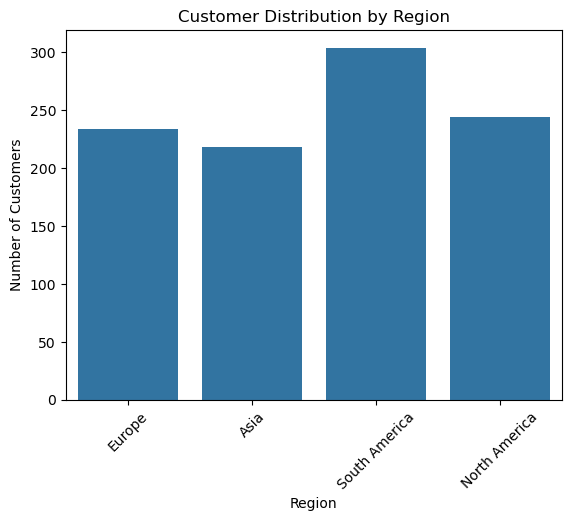

In [130]:
# Business Insight 1: Customer Distribution by Region
sns.countplot(x='Region', data=merged_df)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

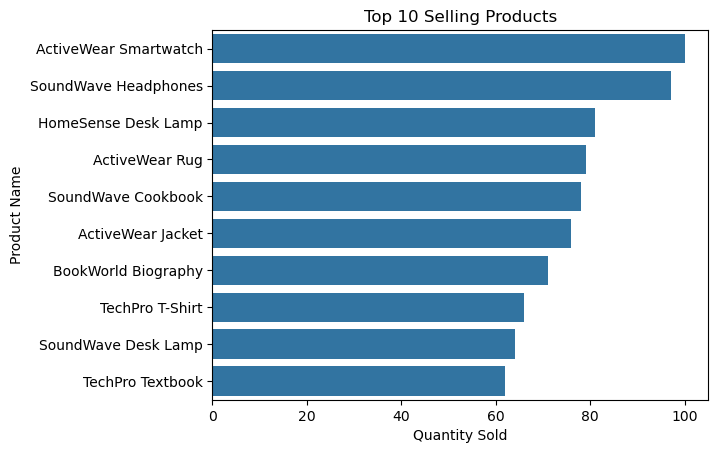

In [122]:
# Business Insight 2: Top Selling Products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

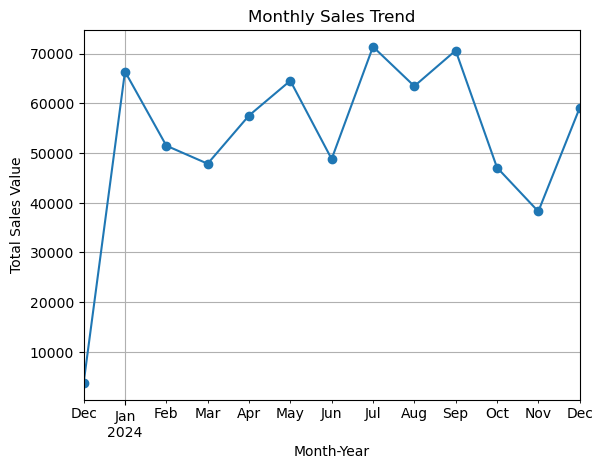

In [124]:
# Business Insight 3: Sales Trend Over Time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('MonthYear')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

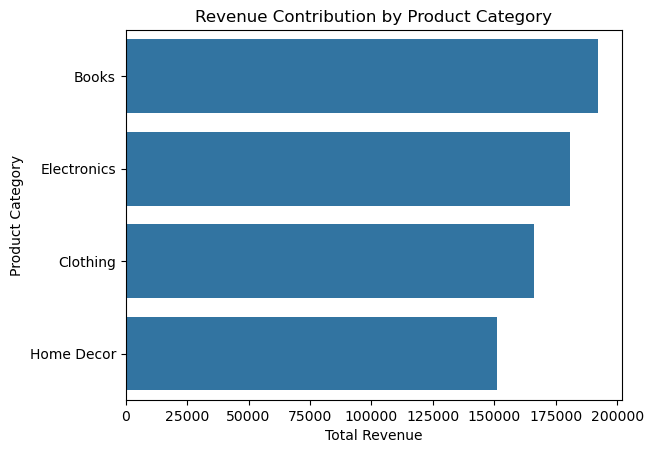

In [126]:
# Business Insight 4: Revenue Contribution by Product Category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Revenue Contribution by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

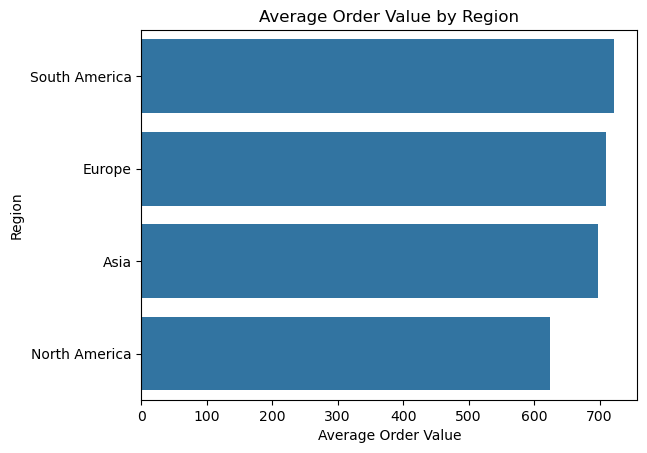

In [128]:
# Business Insight 5: Average Order Value by Region
region_avg_order = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg_order.values, y=region_avg_order.index)
plt.title('Average Order Value by Region')
plt.xlabel('Average Order Value')
plt.ylabel('Region')
plt.show()